Let's look at the detailed time structure of synchrotron pulse.To be more specific, this file shows when electron is moving circularly, and the abserver is in X derection, electron's retarded electric field in that abservation point. Import the necessary libraries first.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In order to show two figure together, let's creat two subplot.

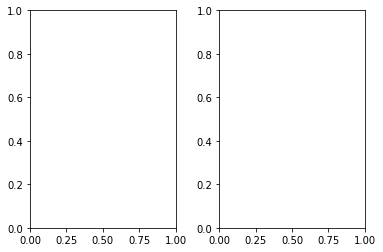

In [22]:
fig, ((ax11, ax12)) = plt.subplots(1,2,
                                 sharex=False,
                                 sharey=False,
                                  tight_layout=False)
fig.subplots_adjust(wspace=0.3)

Now, input the necessary constant physics quantites.

In [23]:
r=1
a,b = (0., 0.)
omega = 1
q = 1.6*10**-19
c = 3*10**8
R=50

Then input variable $\beta$ value, consider large $\beta$ first, and you can change it at your specific case.

In [24]:
beta = 0.8

Now, set the labels and titles of each figure

In [26]:
ax11.axis('equal')
ax11.set_xlabel('x')
ax11.set_ylabel('y',rotation=0)
ax11.set_title('electron motion')
ax12.set_xlabel('t')
ax12.set_ylabel('E(t)',rotation=0)
ax12.set_title(r'$\beta$='+str(beta))

Text(0.5, 1, '$\\beta$=0.8')

We start to define independent variables and it's corresponding electric field.

In [28]:
t = np.arange(-np.pi, np.pi, 0.05)
x = a + r*np.sin(t)
y = b - r*np.cos(t)
line11, = ax11.plot(x,y,lw=2)
E = -q*omega*beta*(beta-np.cos(t))/(1-beta*np.cos(t))**3/c/R
line12, = ax12.plot(t,E,lw=2)

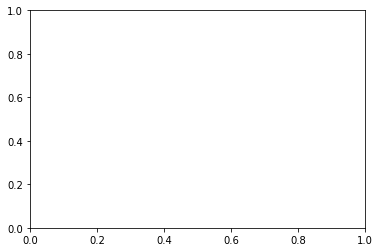

In [30]:
def update_points(num):
    point_ani1.set_data(x[num], y[num])
    point_ani2.set_data(t[num], E[num])
    
    text_pt1.set_position((x[num], y[num]))
    text_pt2.set_position((t[num], E[num]))
    text_pt2.set_text("t=%.1f, E=%.1e"%(t[num], E[num]))
    return point_ani1,point_ani2,text_pt2,


point_ani1, = ax11.plot(x[0], y[0], "ro")  
point_ani2, = ax12.plot(t[0], E[0], "ro")
ax11.grid(ls="--")
ax12.grid(ls="--")
text_pt2= plt.text(1.2, 1.9, '', fontsize=10)
 
ani = animation.FuncAnimation(fig, update_points, frames=500, interval=20, blit=False)
plt.show()